In [2]:
# Import libraries used for the Project
import numpy as np 
import pandas as pd
from scipy import stats
from scipy.stats import skew, kurtosis

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.feature_selection import SelectFromModel

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import tree


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
X_train = pd.read_csv("X_train.csv")
X_val = pd.read_csv("X_val.csv")
X_test = pd.read_csv("X_test.csv")

y_train = pd.read_csv("y_train.csv")
y_val = pd.read_csv("y_val.csv")
y_test = pd.read_csv("y_test.csv")

In [4]:
# Choose the number of features
top6_features = ['Rain_mm', 'RH_9am', 'RH_3pm', 'Temp_3pm', 'Max_Temp', 'Temp_9am']

PART 9 - Ensemble Method 

Bagging Method - Random Forest 

9.1 First Hyperparametres tunning 

In [5]:
# Now we are going to work with our Random Forest, this follows the Bagging Method to train the model 
# We are going to use the GridsearchCV to find parametres. I will keep it on the reserve side to prevent overfitting 
parametres = {
    'n_estimators': [5, 10, 20],
    'max_depth': [None, 5, 10],
    'max_leaf_nodes': [10, 20, 30],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [10, 15, 20],
    'criterion' : ['gini', 'entropy']
}
 

In [6]:
# Now we test the parametres
ran_f = RandomForestClassifier()

# Start the Gridsearch
grid_search = GridSearchCV(ran_f, parametres, cv=5)
grid_search.fit(X_train[top6_features], y_train)

c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'max_leaf_nodes': [10, 20, 30],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [5, 10, 20]})

In [7]:
# Look at the results 
print("Parameters: ", grid_search.best_params_)
print("Score: ", grid_search.best_score_)

# Results
# Parameters:  {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 10}
# Score:  0.9901118748200816

Parameters:  {'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 30, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 5}
Score:  0.9894639709448828


9.2 Cross Validation Test with Gridsearch Parametres  

In [8]:
# Before we test on Validation, I want to see how the current parametres work in a Cross Validation test, I will use 10
# I'm going to keep the same Random State from now on for the Random Forest
ran_f = RandomForestClassifier(max_depth = 10, 
                               min_samples_leaf = 10, 
                               min_samples_split=15,
                               max_leaf_nodes=30, 
                               n_estimators = 10, 
                               criterion='entropy',
                               random_state=69)
accuracy = cross_val_score(ran_f, X_train[top6_features], y_train, scoring='accuracy', cv = 10)

accuracy

# I'm not really happy with first resutl, I will keep looping fromm 9.1 to 9.2 until I like resutls

c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

array([0.99027553, 0.99027553, 0.98703404, 0.99027553, 0.98379254,
       0.98379254, 0.99675851, 0.99189627, 0.98703404, 0.99350649])

9.3 Test on Validation and Testing

In [9]:
# Test on the validation with final parametres and same random_state
ran_f = RandomForestClassifier(max_depth = 10, 
                               min_samples_leaf = 10, 
                               min_samples_split=15,
                               max_leaf_nodes=30, 
                               n_estimators = 11, 
                               criterion='entropy',
                               random_state=69)

# Train the Classifier
ran_f.fit(X_train[top6_features], y_train)

# Test on Validation and Training
print(f"Training: {accuracy_score(ran_f.predict(X_train[top6_features]), y_train)}")
print(f"Validation: {accuracy_score(ran_f.predict(X_val[top6_features]), y_val)}")
print(f"Test: {accuracy_score(ran_f.predict(X_test[top6_features]), y_test)}")

# Socres
#Training: 0.9914086561841465
#Validation: 0.9907901114881241
#Test: 0.9920029080334424

Training: 0.9910844545307181
Validation: 0.9907901114881241
Test: 0.9912758996728462


C:\Users\jmanu\AppData\Local\Temp\ipykernel_2900\1151214558.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ran_f.fit(X_train[top6_features], y_train)


9.4 Visualize Results

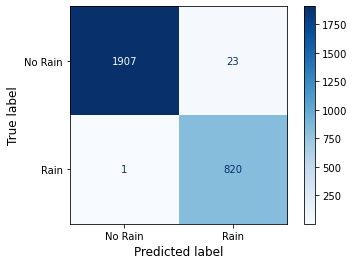

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
confusion_matrix = confusion_matrix(y_test, ran_f.predict(X_test[top6_features]))
disp = ConfusionMatrixDisplay(confusion_matrix, display_labels=['No Rain', 'Rain'])
disp.plot(cmap='Blues', xticks_rotation='horizontal')
disp.ax_.set_xlabel('Predicted label', fontsize=12)
disp.ax_.set_ylabel('True label', fontsize=12)
plt.grid(False)
plt.show()

In [11]:
# Classification Report
print(classification_report(y_test, ran_f.predict(X_test[top6_features])))
print(balanced_accuracy_score(y_test, ran_f.predict(X_test[top6_features])))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1930
           1       0.97      1.00      0.99       821

    accuracy                           0.99      2751
   macro avg       0.99      0.99      0.99      2751
weighted avg       0.99      0.99      0.99      2751

0.9934324373789073
